In [1]:
import math

from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from pcpptc import PolygonInstance
from pcpptc.instance_converter import RegularSquare
from pcpptc.plot import setup_plot, plot_polygon_instance, plot_solution
from pcpptc.plot.polgyon_instance import plot_coverage
from pcpptc.solver_selection.abstract_solver import PolygonInstanceSolver


class OrientedSquare(RegularSquare):
    def __init__(self, point_based, full_coverage, angle, translation):
        super().__init__(point_based=point_based, full_coverage=full_coverage)
        self.angle = angle
        self.translation = translation

    def __call__(self, pi):
        return super().__call__(pi, angle=self.angle, translation=self.translation)


class SquareAlgorithm(PolygonInstanceSolver):
    def __init__(
        self,
        full_coverage=False,
        point_based=False,
        angle: float = 0.0,
        translation=(0.0, 0.0),
    ):
        super().__init__(
            OrientedSquare(
                point_based=point_based,
                full_coverage=full_coverage,
                angle=angle,
                translation=translation,
            )
        )

    def identifier(self) -> str:
        return f"FOOBAR"

In [2]:
p = Polygon([(1.0, 1.0), (41.0, 1.0), (41.0, 9.0), (1.0, 9.0)])
instance = PolygonInstance(
    original_area=p,
    feasible_area=p.buffer(-0.9),
    valuable_areas=[(p, 1.0)],
    tool_radius=1.0,
    turn_cost=50.0,
)

In [9]:
def plot(solution, ax):
    ax.set_aspect("equal", adjustable="box")
    plot_polygon_instance(ax, instance)
    plot_solution(ax, solution, w=2)
    plot_coverage(ax, instance, solution)
    ax.plot(
        [p.x for p in solution.waypoints],
        [p.y for p in solution.waypoints],
        ".",
        c="black",
    )
    plt.tight_layout()

Converting polygon instance to grid instance...
Grid Solver:
Cycle Cover Solver:
Using linear programming and blossom matching to compute a cycle cover with turn-aware, heterogeneous touring costs.
IntegralizingFractionalSolverComputing a fractional solution with some BnB steps to improve integrality.Up to 50 BnB steps are performed.
NeighborBasedStripStrategy selecting 4 atomic strips first on usage than on minimizing the worst case overhead.
------------------------------
Local Relaxation CC Optimization:
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plus opportunity loss.
         
- Repeating 25 times.
------------------------------
Local Relaxation Tour Optimization:
- Like CC version but trying to reconnect unconnected solutions up to 10 times.
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plu

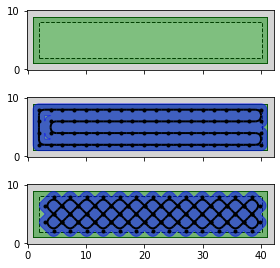

In [10]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(4, 4))
axes[0].set_aspect("equal", adjustable="box")
plot_polygon_instance(axes[0], instance)
solution = SquareAlgorithm(point_based=False, full_coverage=True, angle=0.25 * math.pi)(
    instance
)
plot(solution, axes[2])
solution = SquareAlgorithm(
    point_based=False, full_coverage=True, angle=0.0, translation=(-1.95, 0.0)
)(instance)
plot(solution, axes[1])
plt.savefig("./output/07_very_bad_example.pdf")
plt.show()